In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# File and reporter country names

In [2]:
for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
    country_name = file.replace('.csv', '').split('_')
    
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        continue
        
    reporter_name = df['Reporter'].iloc[0].lower()
    
    if reporter_name not in country_name:
        print(reporter_name, 'not in', country_name)
        print('\n')

state of palestine not in ['palestine']


china, hong kong sar not in ['china', 'hong', 'kong']


lao people's dem. rep. not in ['lao']


antigua and barbuda not in ['antigua', 'and', 'barbuda']


sri lanka not in ['sri', 'lanka']


brunei darussalam not in ['brunei']


dem. rep. of the congo not in ['congo', 'rdc']


viet nam not in ['vietnam']


burkina faso not in ['burkina', 'faso']


cabo verde not in ['cabo', 'verde']


eu-28 not in ['eu28']


costa rica not in ['costa', 'rica']


united arab emirates not in ['united', 'arab', 'emirates']


saint lucia not in ['saint', 'lucia']


china, macao sar not in ['china', 'macao']


dominican rep. not in ['dominican', 'republic']


côte d'ivoire not in ['cote', 'd', 'ivoire']


rep. of korea not in ['korea', 'south']


saint kitts and nevis not in ['saint', 'kitts', 'and', 'nevis']


bosnia herzegovina not in ['bosnia', 'herzegovinia']


south africa not in ['south', 'africa']


saint vincent and the grenadines not in ['saint', 'vincent',

All file names seem to be attributed to the right reporter (manual check).

# Numbers of records

We want to verify whether there is no weirdly recurring number of records that could indicate a download limit.

In [3]:
nb_records = []

for file in os.listdir('db_downloads'):
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        continue
        
    elif df.shape[0] == 100000:
        # We print the name of the file it contains 100,000 records exactly
        print(file)
        nb_records.append(df.shape[0])
        
    elif df.shape[0] % 1000 == 0:
        # We print the name of the file if its number of records is divisible by 1,000
        print(file)
        nb_records.append(df.shape[0])
    
    else:
        nb_records.append(df.shape[0])

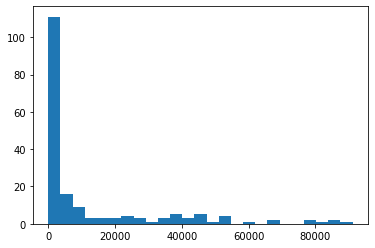

In [4]:
plt.hist(nb_records, bins=25);

# Countries without any data

In [8]:
countries_without_data = []

for file in os.listdir('db_downloads'):
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        countries_without_data.append(file)
        
    else:
        continue

In [9]:
textfile = open("countries_without_data.txt", "w")

for country in sorted(countries_without_data):
    textfile.write(country + "\n")
    
textfile.close()

# Counter-checking with total imports

## Comparison with the complete dataset with partner WORLD

In [63]:
total_inward_flows = pd.read_csv('agg_datasets/all_fields.csv')

In [64]:
total_inward_flows = total_inward_flows[
    total_inward_flows['Trade Flow'].isin(
        ['M', 'RM']
    )
].copy()

In [65]:
total_inward_flows.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H2,2016,2016,2016,5,0,0,M,4,Afghanistan,...,NaN,-1,NaN,NaN,NaN,NaN,6534140413,6.534140e+09,NaN,0
2,H4,2016,2016,2016,5,0,0,M,8,Albania,...,NaN,-1,NaN,NaN,NaN,NaN,4669289913,4.669290e+09,NaN,0
4,H4,2016,2016,2016,5,0,0,M,12,Algeria,...,NaN,-1,NaN,NaN,NaN,NaN,47090683586,4.709068e+10,NaN,0
6,H4,2016,2016,2016,5,0,0,M,20,Andorra,...,0.0,-1,NaN,0.0,NaN,NaN,1354095936,1.354096e+09,NaN,0
7,H4,2016,2016,2016,5,0,0,RM,20,Andorra,...,0.0,-1,NaN,0.0,NaN,NaN,1198554,1.198555e+06,NaN,0


In [66]:
total_inward_flows = total_inward_flows[total_inward_flows['2nd Partner ISO'] == 'W00'].copy()
total_inward_flows = total_inward_flows[total_inward_flows['Mode of Transport Code'] == 0].copy()
total_inward_flows = total_inward_flows[total_inward_flows['Customs Proc. Code'] == 'C00'].copy()

In [67]:
total_inward_flows['KEY'] = total_inward_flows['Reporter ISO'] + total_inward_flows['Partner ISO']\
    + total_inward_flows['Year'].astype(str) + total_inward_flows['Trade Flow']

mapping = total_inward_flows.groupby('KEY').count()['Trade Value (US$)'].to_dict()
total_inward_flows['NB_RECORDS'] = total_inward_flows['KEY'].map(mapping)

total_inward_flows = total_inward_flows[
    np.logical_or(
        total_inward_flows['NB_RECORDS'] == 1,
        np.logical_and(
            total_inward_flows['NB_RECORDS'] > 1,
            total_inward_flows['Classification'] == 'H5'
        )
    )
].copy()

In [68]:
total_inward_flows = total_inward_flows[
    ['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Trade Value (US$)']
].reset_index(drop=True)

In [69]:
total_inward_flows.sort_values(by=['Reporter ISO', 'Year']).head(20)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)
415,2016,M,Aruba,ABW,1117122531
422,2017,M,Aruba,ABW,1194654491
429,2018,M,Aruba,ABW,1257869571
0,2016,M,Afghanistan,AFG,6534140413
13,2017,M,Afghanistan,AFG,7792600111
25,2018,M,Afghanistan,AFG,7406590324
5,2016,RM,Angola,AGO,9758989
6,2016,M,Angola,AGO,14347710497
18,2017,M,Angola,AGO,15462313478
29,2018,M,Angola,AGO,16036479575


In [53]:
dataframes = []

for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
        
    else:
        df = pd.read_csv(f'db_downloads/{file}')
        
        if df.shape[0] == 1:
            continue
        
        else:
            dataframes.append(df)

In [54]:
data = pd.concat(dataframes, axis=0)

In [55]:
data = data[data['Trade Flow'].isin(['M', 'RM'])].copy()
data = data[data['Partner'] != 'World'].copy()
data = data[data['2nd Partner'] == 'World'].copy()
data = data[data['Mode of Transport Code'] == 0].copy()
data = data[data['Customs Proc. Code'] == 'C00'].copy()

In [56]:
data['KEY'] = data['Reporter ISO'] + data['Partner ISO'] + data['Year'].astype(str) + data['Trade Flow']

mapping = data.groupby('KEY').count()['Trade Value (US$)'].to_dict()
data['NB_RECORDS'] = data['KEY'].map(mapping)

data = data[
    np.logical_or(
        data['NB_RECORDS'] == 1,
        np.logical_and(
            data['NB_RECORDS'] > 1,
            data['Classification'] == 'H5'
        )
    )
].copy()

In [57]:
data.shape

(87322, 37)

In [58]:
grouped_df = data.groupby(
    ['Year', 'Trade Flow', 'Reporter ISO']
).sum()[
    'Trade Value (US$)'
].reset_index().sort_values(
    by=['Reporter ISO', 'Year']
)

In [59]:
grouped_df.head(20)

,Year,Trade Flow,Reporter ISO,Trade Value (US$)
0,2016,M,ABW,1117122520
212,2017,M,ABW,1194654482
423,2018,M,ABW,1257869564
1,2016,M,AFG,6534140414
213,2017,M,AFG,7792600063
424,2018,M,AFG,7406590273
2,2016,M,AGO,14347710420
170,2016,RM,AGO,9758989
214,2017,M,AGO,15462313407
425,2018,M,AGO,16036479474


In [70]:
# 3 rows with missing ISO codes for "Other Asia, nes" as a reporter
total_inward_flows.isnull().sum()

Year                 0
Trade Flow           0
Reporter             0
Reporter ISO         0
Trade Value (US$)    0
dtype: int64

In [71]:
merged_df = total_inward_flows.dropna().merge(   # NB: we eliminate the rows with missing ISO codes for Other Asia
    grouped_df,
    on=['Year', 'Trade Flow', 'Reporter ISO'],
    how='left'
)

In [72]:
merged_df[merged_df['Trade Value (US$)_y'].isnull()]

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y


In [73]:
temp = merged_df.dropna().copy()

In [74]:
temp.head()

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y
0,2016,M,Afghanistan,AFG,6534140413,6534140414
1,2016,M,Albania,ALB,4669289913,4669289915
2,2016,M,Algeria,DZA,47090683586,47090683586
3,2016,M,Andorra,AND,1354095936,1354095869
4,2016,RM,Andorra,AND,1198554,1198554


In [75]:
temp['DIFF'] = np.abs(temp['Trade Value (US$)_x'] - temp['Trade Value (US$)_y']).values

In [76]:
temp['%_DIFF'] = temp['DIFF'] / temp['Trade Value (US$)_x'] * 100

In [78]:
temp.sort_values(by='%_DIFF', ascending=False).head(15)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y,DIFF,%_DIFF
89,2016,RM,Burundi,BDI,1346,1347,1,0.074294
97,2017,RM,Burundi,BDI,5154,5152,2,0.038805
106,2018,RM,Burundi,BDI,32659,32657,2,0.006124
50,2017,RM,Armenia,ARM,1180242,1180235,7,0.000593
219,2018,RM,Georgia,GEO,5439285,5439269,16,0.000294
213,2017,RM,Georgia,GEO,4685124,4685111,13,0.000277
208,2016,RM,Georgia,GEO,4812783,4812770,13,0.000270
341,2017,RM,Madagascar,MDG,6949448,6949432,16,0.000230
390,2017,RM,Mongolia,MNG,5106836,5106828,8,0.000157
352,2018,RM,Madagascar,MDG,10967117,10967102,15,0.000137


## Comparison with the simplified dataset with partner WORLD

In [79]:
total_inward_flows = pd.read_csv('agg_datasets/simplified.csv')

In [80]:
total_inward_flows = total_inward_flows[
    total_inward_flows['Trade Flow'].isin(
        ['Import', 'Re-Import']
    )
].copy()

In [81]:
total_inward_flows.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2018,2018,2018,0,0,1,Import,4,Afghanistan,...,0.0,NaN,NaN,NaN,NaN,NaN,7406590324,NaN,NaN,4
3,H2,2016,2016,2016,0,0,1,Import,4,Afghanistan,...,NaN,NaN,NaN,NaN,NaN,NaN,6534140413,NaN,NaN,0
5,H2,2017,2017,2017,0,0,1,Import,4,Afghanistan,...,0.0,NaN,NaN,NaN,NaN,NaN,7792600111,NaN,NaN,4
7,H5,2017,2017,2017,0,0,1,Import,8,Albania,...,0.0,NaN,NaN,NaN,0.0,NaN,5293901931,NaN,NaN,4
9,H5,2018,2018,2018,0,0,1,Import,8,Albania,...,0.0,NaN,NaN,NaN,0.0,NaN,5941286949,NaN,NaN,4


In [82]:
total_inward_flows = total_inward_flows[
    ['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Trade Value (US$)']
].reset_index(drop=True)

In [83]:
total_inward_flows.sort_values(by=['Reporter ISO', 'Year']).head(20)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)
419,2016,Import,Aruba,ABW,1117122531
420,2017,Import,Aruba,ABW,1194654491
421,2018,Import,Aruba,ABW,1257869571
1,2016,Import,Afghanistan,AFG,6534140413
2,2017,Import,Afghanistan,AFG,7792600111
0,2018,Import,Afghanistan,AFG,7406590324
15,2016,Import,Angola,AGO,14347710497
16,2016,Re-Import,Angola,AGO,9758989
17,2017,Import,Angola,AGO,15462313478
14,2018,Import,Angola,AGO,16036479575


In [84]:
dataframes = []

for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
        
    else:
        df = pd.read_csv(f'db_downloads/{file}')
        
        if df.shape[0] == 1:
            continue
        
        else:
            dataframes.append(df)

In [85]:
data = pd.concat(dataframes, axis=0)

In [86]:
data = data[data['Trade Flow'].isin(['M', 'RM'])].copy()
data = data[data['Partner'] != 'World'].copy()
data = data[data['2nd Partner'] == 'World'].copy()
data = data[data['Mode of Transport Code'] == 0].copy()
data = data[data['Customs Proc. Code'] == 'C00'].copy()

In [87]:
data['KEY'] = data['Reporter ISO'] + data['Partner ISO'] + data['Year'].astype(str) + data['Trade Flow']

mapping = data.groupby('KEY').count()['Trade Value (US$)'].to_dict()
data['NB_RECORDS'] = data['KEY'].map(mapping)

data = data[
    np.logical_or(
        data['NB_RECORDS'] == 1,
        np.logical_and(
            data['NB_RECORDS'] > 1,
            data['Classification'] == 'H5'
        )
    )
].copy()

In [88]:
data.shape

(87322, 37)

In [89]:
grouped_df = data.groupby(
    ['Year', 'Trade Flow', 'Reporter ISO']
).sum()[
    'Trade Value (US$)'
].reset_index().sort_values(
    by=['Reporter ISO', 'Year']
)

In [90]:
grouped_df.head(20)

,Year,Trade Flow,Reporter ISO,Trade Value (US$)
0,2016,M,ABW,1117122520
212,2017,M,ABW,1194654482
423,2018,M,ABW,1257869564
1,2016,M,AFG,6534140414
213,2017,M,AFG,7792600063
424,2018,M,AFG,7406590273
2,2016,M,AGO,14347710420
170,2016,RM,AGO,9758989
214,2017,M,AGO,15462313407
425,2018,M,AGO,16036479474


In [91]:
total_inward_flows['Trade Flow'] = total_inward_flows['Trade Flow'].map(
    {'Import': 'M', 'Re-Import': 'RM'}
) 

In [92]:
# 3 rows with missing ISO codes for "Other Asia, nes" as a reporter
total_inward_flows.isnull().sum()

Year                 0
Trade Flow           0
Reporter             0
Reporter ISO         3
Trade Value (US$)    0
dtype: int64

In [93]:
merged_df = total_inward_flows.dropna().merge(   # NB: we eliminate the rows with missing ISO codes for Other Asia
    grouped_df,
    on=['Year', 'Trade Flow', 'Reporter ISO'],
    how='left'
)

In [94]:
merged_df[merged_df['Trade Value (US$)_y'].isnull()]

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y
127,2017,RM,Chile,CHL,13404108,NaN
131,2016,RM,Chile,CHL,12251315,NaN
157,2017,M,Cyprus,CYP,9310362788,NaN
231,2017,M,Kiribati,KIR,107885470,NaN
232,2018,M,Kiribati,KIR,102649569,NaN


In [95]:
temp = merged_df.dropna().copy()

In [96]:
temp.head()

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y
0,2018,M,Afghanistan,AFG,7406590324,7.406590e+09
1,2016,M,Afghanistan,AFG,6534140413,6.534140e+09
2,2017,M,Afghanistan,AFG,7792600111,7.792600e+09
3,2017,M,Albania,ALB,5293901931,5.293902e+09
4,2018,M,Albania,ALB,5941286949,5.941287e+09


In [97]:
temp['DIFF'] = np.abs(temp['Trade Value (US$)_x'] - temp['Trade Value (US$)_y']).values

In [98]:
temp['%_DIFF'] = temp['DIFF'] / temp['Trade Value (US$)_x'] * 100

In [99]:
temp.sort_values(by='%_DIFF', ascending=False).head(20)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y,DIFF,%_DIFF
582,2016,M,Turkey,TUR,202189241859,7.079538e+10,1.313939e+11,64.985584
272,2017,RM,Ireland,IRL,55997242,7.231204e+07,1.631479e+07,29.134994
51,2018,RM,Armenia,ARM,6352111,8.189328e+06,1.837217e+06,28.922936
571,2018,M,Togo,TGO,1726568044,1.907144e+09,1.805759e+08,10.458660
73,2018,M,Brazil,BRA,192840115910,1.812305e+11,1.160962e+10,6.020333
281,2017,RM,Italy,ITA,5098741110,5.260892e+09,1.621508e+08,3.180212
271,2017,M,Ireland,IRL,88828357456,8.681305e+10,2.015303e+09,2.268761
337,2017,RM,Luxembourg,LUX,223942060,2.189420e+08,5.000042e+06,2.232739
339,2018,RM,Luxembourg,LUX,257599958,2.538875e+08,3.712440e+06,1.441165
230,2016,M,Kiribati,KIR,118990192,1.174084e+08,1.581842e+06,1.329389


# Data selection process

## Testing the Python file

In [2]:
from data_selection import get_selected_data

In [3]:
%%time
data = get_selected_data()

CPU times: user 13.9 s, sys: 4.88 s, total: 18.8 s
Wall time: 20.4 s


In [4]:
data.head()

,Year,Trade Flow,Reporter,Reporter ISO,Partner,Partner ISO,Trade Value (US$)
0,2016,M,Ethiopia,ETH,Costa Rica,CRI,145426
1,2016,M,Ethiopia,ETH,Afghanistan,AFG,2379
2,2016,M,Ethiopia,ETH,Albania,ALB,80127
3,2016,M,Ethiopia,ETH,Algeria,DZA,29076
4,2016,M,Ethiopia,ETH,Angola,AGO,30426


## Partial preprocessing

What follows should be operated in the `destination_based_sales` package, where I prepare trade statistics.

In [5]:
# Eliminating certain reporting entities in which we are not interested
data = data[~data['Reporter'].isin(['EU-28', 'ASEAN', 'Other Asia, nes'])].copy()

In [6]:
# Eliminating certain partner entities in which we are not interested
data = data[
    ~data['Partner'].isin(
        [
            'Other Asia, nes', 'Special Categories', 'Other Africa, nes', 'Areas, nes', 
            'Other Europe, nes', 'Bunkers', 'LAIA, nes', 'Oceania, nes', 
            'North America and Central America, nes', 'Free Zones'
        ]
    )
].copy()

In [7]:
data = data.drop(columns=['Reporter', 'Partner'])

In [8]:
data_reshaped = data.pivot(
    index=['Year', 'Reporter ISO', 'Partner ISO'],
    columns='Trade Flow',
    values='Trade Value (US$)'
).reset_index()

In [9]:
data_reshaped['RM'] = data_reshaped['RM'].fillna(0)

In [10]:
data_reshaped['NET_IMPORTS'] = data_reshaped['M'] - data_reshaped['RM']

In [11]:
data_reshaped = data_reshaped.drop(columns=['M', 'RM'])

In [26]:
data_reshaped = data_reshaped.rename(
    columns={
        'Year': 'YEAR',
        'Reporter ISO': 'OTHER_COUNTRY_CODE',
        'Partner ISO': 'AFFILIATE_COUNTRY_CODE',
        'NET_IMPORTS': 'MERCHANDISE_EXPORTS'
    }
)

In [28]:
data_reshaped.head()

Trade Flow,YEAR,OTHER_COUNTRY_CODE,AFFILIATE_COUNTRY_CODE,MERCHANDISE_EXPORTS
0,2016,ABW,BEL,476502.0
1,2016,ABW,BHS,901364.0
2,2016,ABW,BRA,14347015.0
3,2016,ABW,CHE,688192.0
4,2016,ABW,CHN,17022453.0


## Identifying a headquarter country bias?

In [23]:
# BEA data

In [53]:
from destination_based_sales.bea import BEADataPreprocessor

In [60]:
processor = BEADataPreprocessor(year=2016)

In [61]:
bea_data = processor.load_final_data()

In [62]:
bea_data = bea_data[['CODE', 'TOTAL_OTHER_COUNTRY', 'TOTAL_US']].copy()

In [63]:
bea_data['US_WEIGHT'] = bea_data['TOTAL_US'] / (bea_data['TOTAL_OTHER_COUNTRY'] + bea_data['TOTAL_US']) * 100

In [64]:
# Comtrade data

In [65]:
comtrade_data = data_reshaped[data_reshaped['YEAR'] == 2016].drop(columns='YEAR')

In [66]:
comtrade_data

Trade Flow,OTHER_COUNTRY_CODE,AFFILIATE_COUNTRY_CODE,MERCHANDISE_EXPORTS
0,ABW,BEL,4.765020e+05
1,ABW,BHS,9.013640e+05
2,ABW,BRA,1.434702e+07
3,ABW,CHE,6.881920e+05
4,ABW,CHN,1.702245e+07
...,...,...,...
27260,ZWE,VNM,1.330285e+06
27261,ZWE,WLF,1.320000e+02
27262,ZWE,YEM,9.200000e+01
27263,ZWE,ZAF,2.177861e+09


In [67]:
comtrade_data_grouped = comtrade_data.groupby('AFFILIATE_COUNTRY_CODE').sum().reset_index()

In [68]:
def get_exports_to_the_US(country_code):
    df = comtrade_data[
        np.logical_and(
            comtrade_data['AFFILIATE_COUNTRY_CODE'] == country_code,
            comtrade_data['OTHER_COUNTRY_CODE'] == 'USA'
        )
    ].copy()
    
    if df.empty:
        return 0
    
    else:
        return df['MERCHANDISE_EXPORTS'].iloc[0]

In [69]:
comtrade_data_grouped['US_MERCHANDISE_EXPORTS'] = comtrade_data_grouped['AFFILIATE_COUNTRY_CODE'].map(
    get_exports_to_the_US
)

In [70]:
comtrade_data_grouped['US_WEIGHT_EXPORTS'] = (
    comtrade_data_grouped['US_MERCHANDISE_EXPORTS'] / comtrade_data_grouped['MERCHANDISE_EXPORTS']
) * 100

In [71]:
# Merging the two datasets

In [72]:
bea_data[['CODE', 'US_WEIGHT']].merge(
    comtrade_data_grouped[['AFFILIATE_COUNTRY_CODE', 'US_WEIGHT_EXPORTS']],
    how='inner',
    left_on='CODE', right_on='AFFILIATE_COUNTRY_CODE'
)

,CODE,US_WEIGHT,AFFILIATE_COUNTRY_CODE,US_WEIGHT_EXPORTS
0,CAN,84.016308,CAN,72.919079
1,AUT,22.730730,AUT,7.832363
2,BEL,16.704569,BEL,5.769987
3,CZE,6.493701,CZE,3.147000
4,DNK,16.648970,DNK,9.796626
5,FIN,44.418825,FIN,7.695989
6,FRA,13.417396,FRA,9.473864
7,DEU,15.120352,DEU,9.639374
8,GRC,8.436725,GRC,5.247090
9,HUN,15.417853,HUN,5.531051


# Have the data changed?

In [8]:
csv_df = pd.read_csv('selected_comtrade_data.csv')

In [9]:
from data_selection import get_selected_data

last_df = get_selected_data()

In [10]:
print('Shape of the saved DataFrame:', csv_df.shape)
print('Shape of the newly loaded DataFrame:', last_df.shape)

Shape of the saved DataFrame: (87146, 7)
Shape of the newly loaded DataFrame: (87146, 7)


In [11]:
(csv_df != last_df).sum()

Year                 0
Trade Flow           0
Reporter             0
Reporter ISO         0
Partner              0
Partner ISO          0
Trade Value (US$)    0
dtype: int64